<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -l -s https://github.com/opencv/opencv.git 
!pwd

Cloning into 'opencv'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 276988 (delta 0), reused 1 (delta 0), pack-reused 276985
Receiving objects: 100% (276988/276988), 470.19 MiB | 28.61 MiB/s, done.
Resolving deltas: 100% (193543/193543), done.
Checking out files: 100% (6450/6450), done.
/content


In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 211 (delta 28), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (211/211), 104.55 MiB | 29.64 MiB/s, done.
Resolving deltas: 100% (97/97), done.
/content/cloned-repo
drawing.ipynb			     opencv2.ipynb  opencv9a.ipynb
faceDetection.ipynb		     opencv3.ipynb  opencv9.ipynb
haarcascade_frontalface_default.xml  opencv4.ipynb  opencvKMeans.ipynb
images				     opencv5.ipynb  PassportScan.ipynb
opencv10a.ipynb			     opencv6.ipynb  pedestrians.ipynb
opencv10.ipynb			     opencv7.ipynb  README.md
opencv1.ipynb			     opencv8.ipynb


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Use the built-in Haar cascade classifiers in OpenCV. these classifiers have already been pre-trained to recognize faces!

These classifiers work by scanning an image from left to right, and top to bottom, at varying scale sizes. Scanning an image from left to right and top to bottom is called the “sliding window” approach.<br>
As the window moves from left to right and top to bot- tom, one pixel at a time, the classifier is asked whether or not it “thinks” there is a face in the current window, based on the parameters supplied to the classifier.


• **scaleFactor**: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the fore- ground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is re- ducing the size of the image by 5% at each level in the pyramid.<br><br>
• **minNeighbors**: How many neighbors each window should have for the area in the window to be consid- ered a face. The cascade classifier will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) need to be detected for the window to be labeled a face.<br><br>
• **minSize**: A tuple of width and height (in pixels) in- dicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.


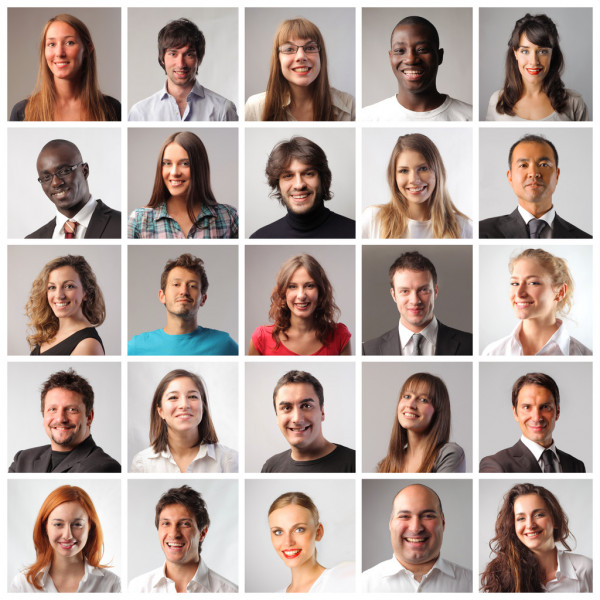

In [4]:
image = cv2.imread("images/faces.jpg")
cv2_imshow(image)

# **Convert the image to grayscale**

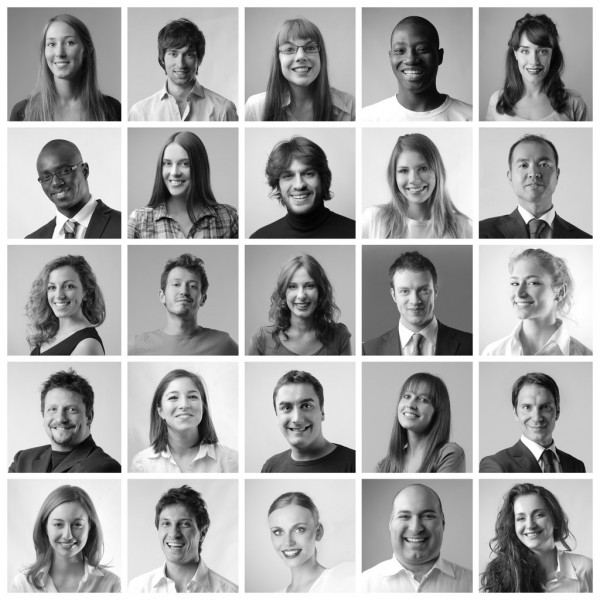

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

The parameters to the cv2.detect-MutliScale function tend to be sensitive, and some parameter choices for one set of images will not work for another set of images.

**In most cases, the offending culprit will be the scaleFactor parameter.**<br> 
In other cases it may be minNeighbors. <br>
As a debugging rule, start with the scaleFactor, adjust it as needed, and then move on to minNeighbors.


**Use the classifier, equalizerHist, and detectMultiScale to find faces in the grayscale image**

In [8]:
# initialize front face classifier
cascade = cv2.CascadeClassifier(
  "/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml")

frame = cv2.imread('face.jpeg')

# Convert to black-and-white
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blackwhite = cv2.equalizeHist(gray)

rects = cascade.detectMultiScale(blackwhite, 
                                 scaleFactor=1.1, 
                                 minNeighbors=3, 
                                 minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE)

**Plot the rectangles on the full color image**

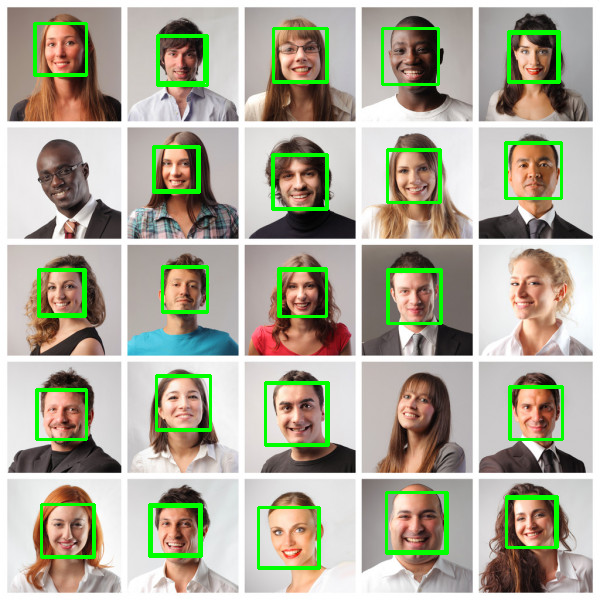

In [9]:
for (x, y, w, h) in rects:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)

While Haar cascades are quite fast and can obtain decent accuracy, they have two prominent shortcomings.

**The first is parameter tuning**. You’ll (likely) need to tweak the parameters of the detectMultiScale  function on a per-image basis. This can be a real pain, especially if you are looking to bulk process a dataset of images and cannot manually inspect the output of each face detection.

**The second shortcoming** is that Haar cascades can be highly prone to false positives, meaning that faces are detected when there really aren’t any there!

Again, this problem can be fixed by tuning the parameters of detectMultiScale  on a case-by-case basis.

If you find yourself in a situation where either method is not working to your required level of accuracy:

**Haar cascades are not giving you your desired level of accuracy**.
You need to train your own custom object detector.<br>

I would suggest using the HOG + Linear SVM framework, utilizing an image pyramid and sliding windows, you can detect objects in images at various scales and locations.

# **Assignment 1**
Detect all the faces in images/faces3.jpg

# **Detect Eyes**

There are two stages in a cascade classifier: <br>detection<br>
 training. <br><br>
OpenCV offers pre-trained classifiers such as eyes, face, and smile. <br>
<br>In order to detect, those classifiers, there are XML files associated to the classifiers that must be imported into your code.

In [52]:
face_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')
eyeglasses_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

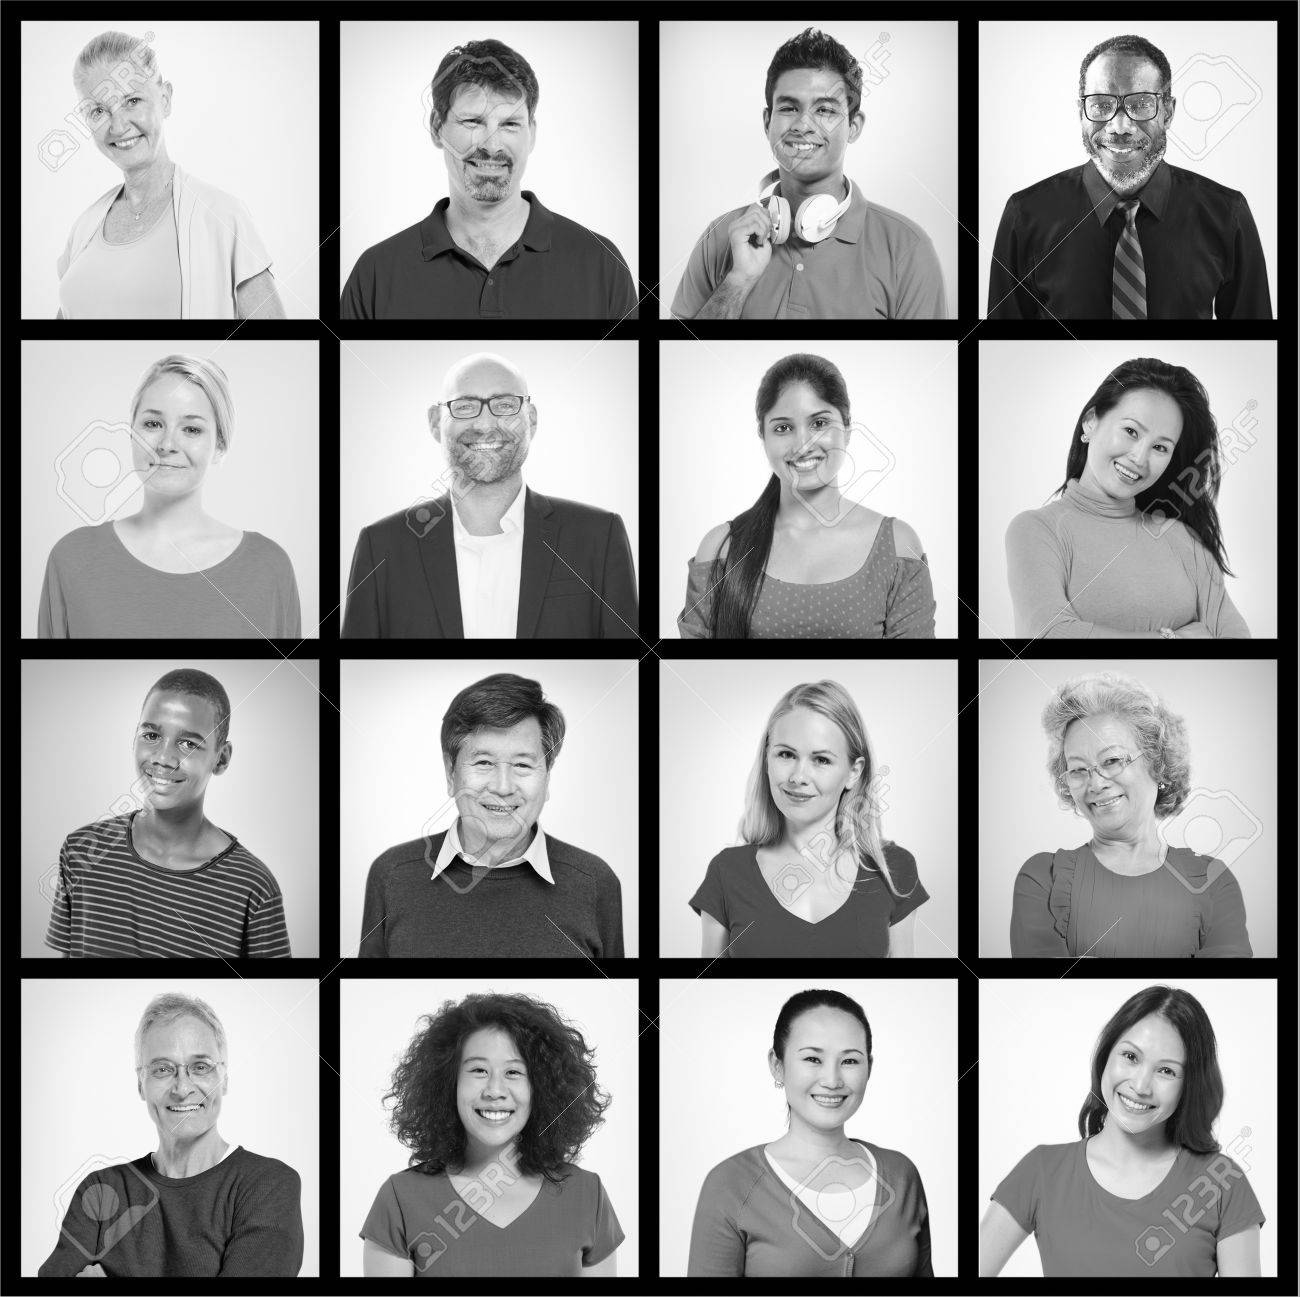

In [53]:
img = cv2.imread("images/faces4.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [54]:
blackwhite = cv2.equalizeHist(gray)

rects = cascade.detectMultiScale(blackwhite, 
                                 scaleFactor=1.1, 
                                 minNeighbors=3, 
                                 minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE)

In [67]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    #eyeglasses = eyeglasses_cascade.detectMultiScale(roi_gray)
    #for (ex,ey,ew,eh) in eyeglasses:
    #    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

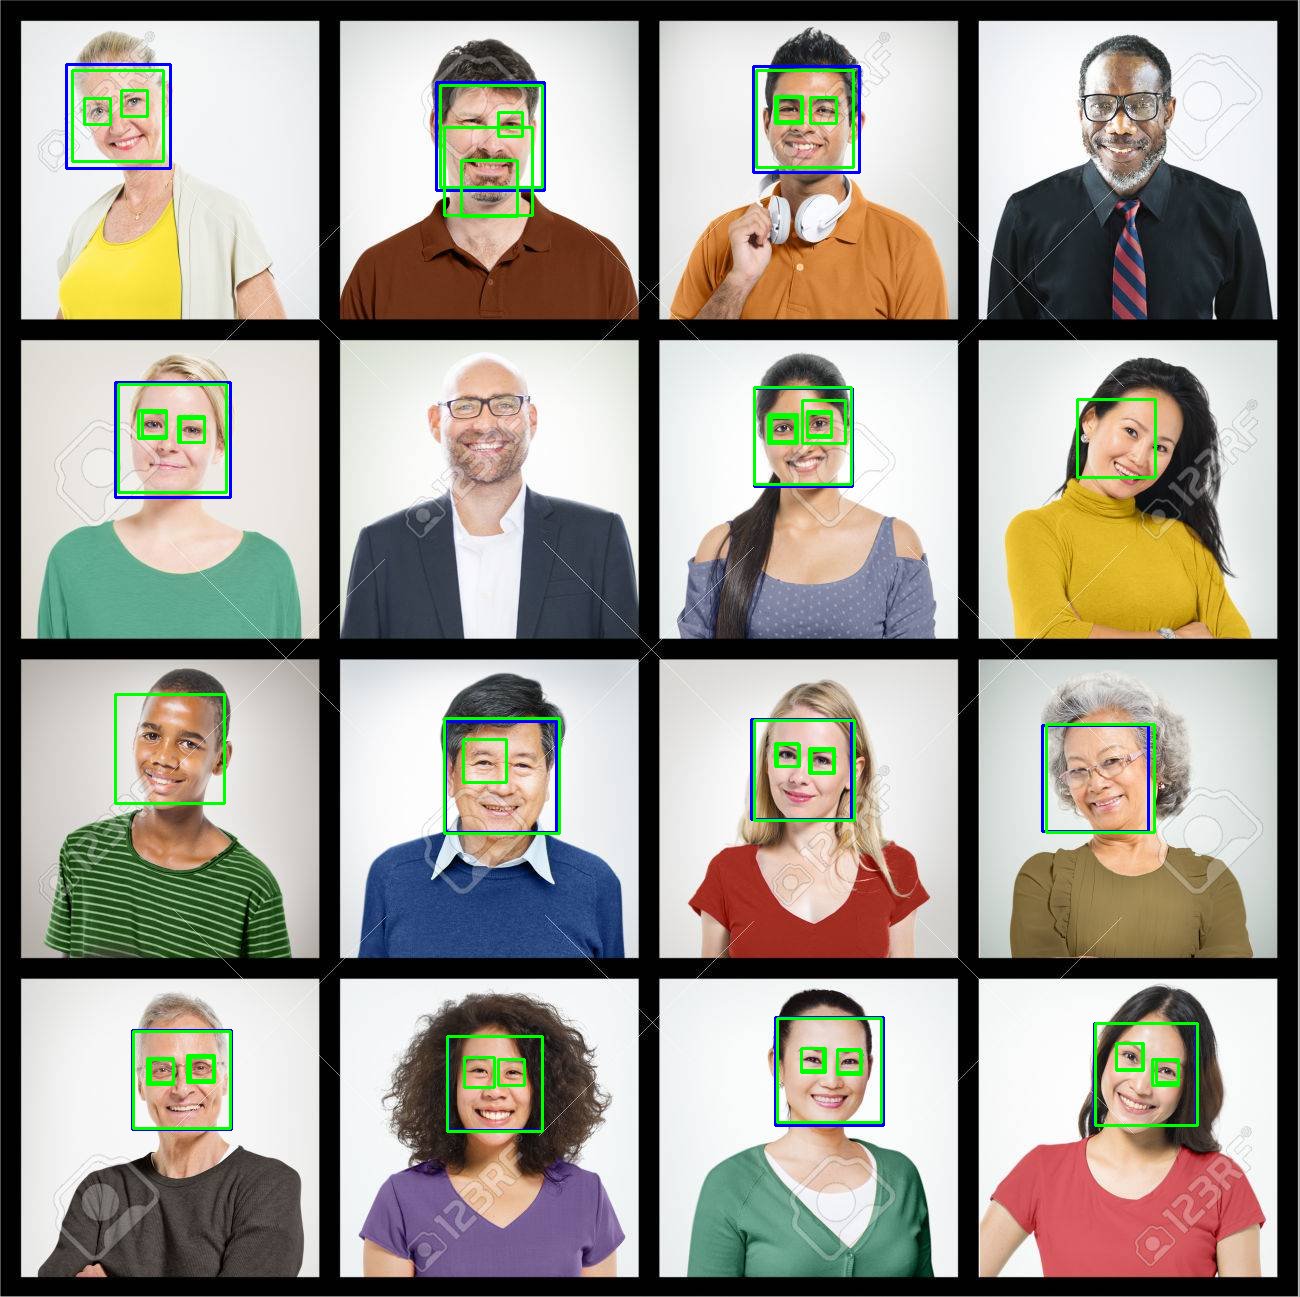

In [68]:
for (x, y, w, h) in rects:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(img)